**UE 4268 - Examen 2023**

**`MBAJOUEN ARMEL`**, `22W2544` et `armel.mbajouen@facsciences-uy1.cm`

Department of Physics - Faculty of Science - University of Yaoundé I

`Nom Du Laboratoire : PMB`

`19/06/2023`

In [12]:
from IPython.display import Image

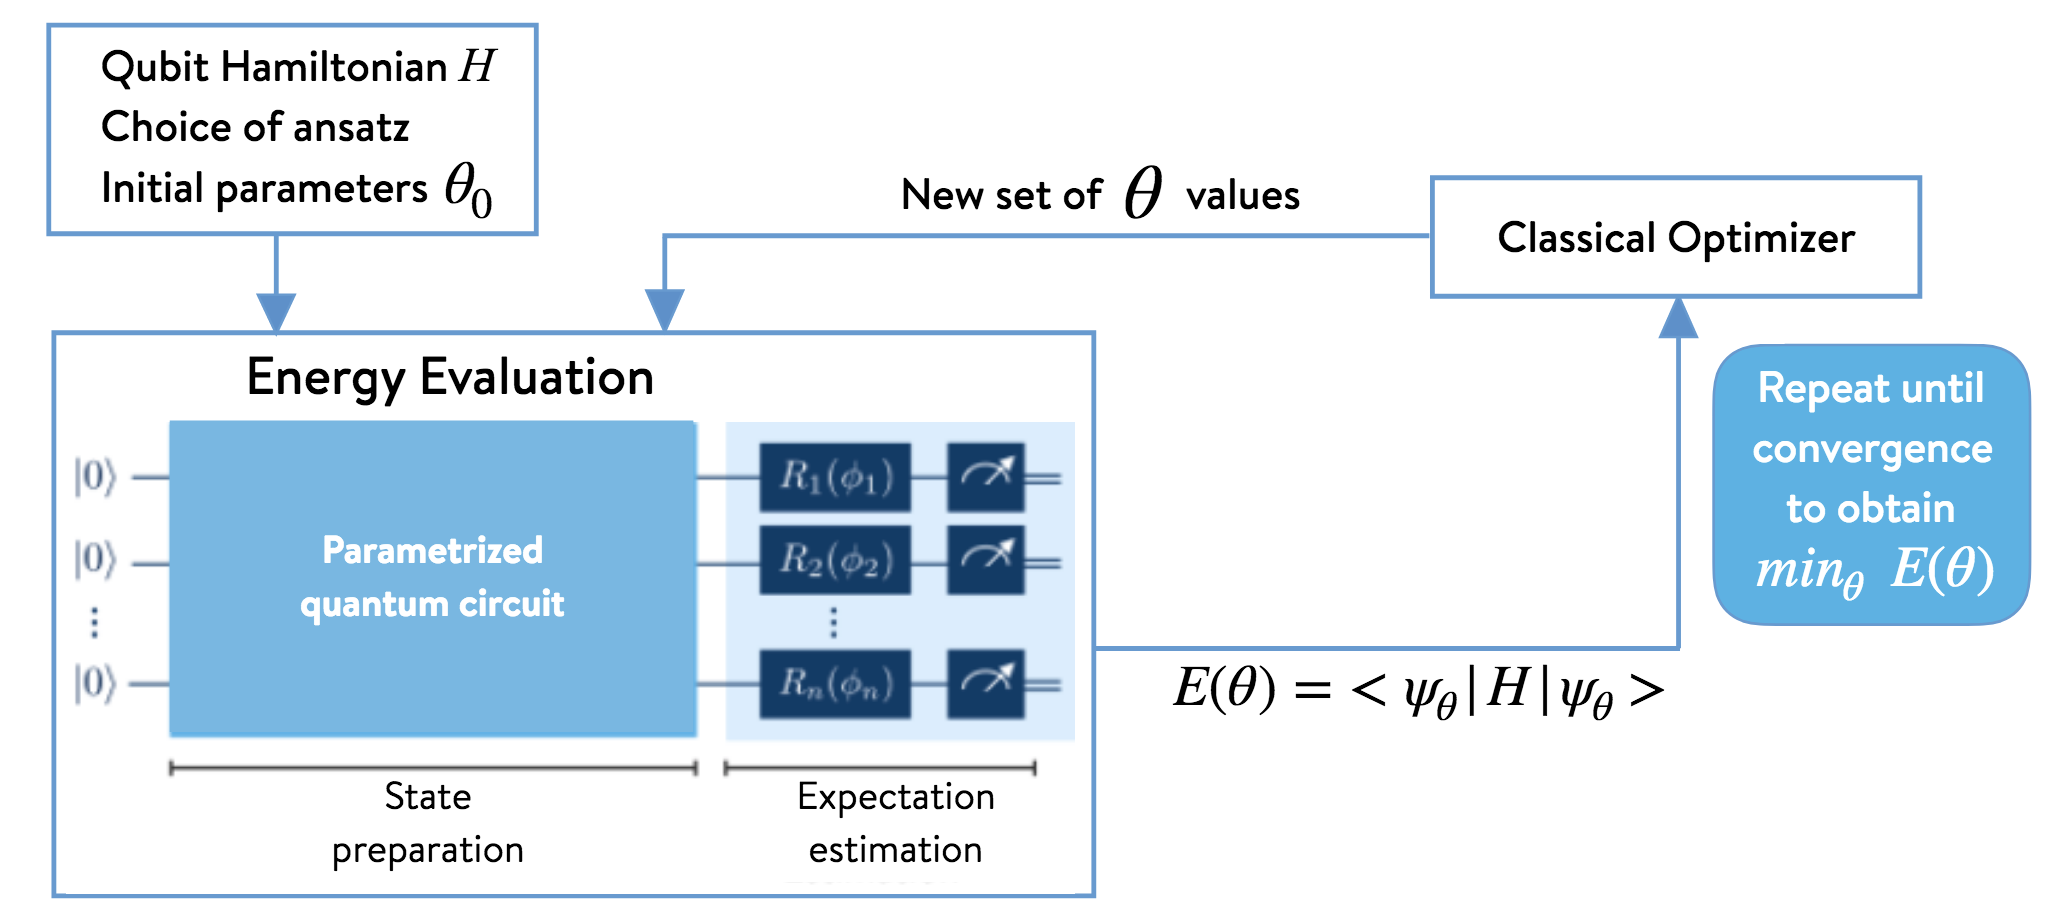

In [13]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [14]:
import sklearn
print(sklearn.__version__)

1.2.2


In [15]:
import rdkit
print(rdkit.__version__)

2023.03.1


In [1]:
import sys, os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
!ls

drive  sample_data


In [6]:
%cd drive

/content/drive


In [7]:
!ls

MyDrive  Shareddrives


In [8]:
%cd MyDrive

/content/drive/MyDrive


In [9]:
!ls

'Armel MBAJOUEN - EF2.zip (Unzipped Files)'
'AZEBAZE DONGMO Brunelle Flora_PHY 4268_PROJET 3_V230604.ipynb'
'bon fax vqe(6 7) projet3 .ipynb'
 Classroom
'Colab Notebooks'
 EF3.gdoc
'Evaluation Sommative_V2306.ipynb'
 IBM-cert-exam-study-questions-main
 labs
'MBAJOUEN Armel_UE4268_EF6_V230614.ipynb'
'MBAJOUEN Armel_UE4268_PROJET3_V230602.ipynb'
 MVOTO-KONGO-PATRICK-SORREL_19D2706_UE-PHY4268_V2303_EF5.ipynb
'Qiskit EF4.zip (Unzipped Files)'
'Qiskit EF4.zip (Unzipped Files) (1)'
'Qiskit Lab 4'
'Qiskit Lab 4 -  Fermionic Hamiltonian 230421.ipynb'
'Qiskit Lab 5 -  Qubit Hamiltonian 230509.ipynb'
'Qiskit Lab 6 mai 2023'
'Qiskit Lab 6 mai 2023 (1)'
'QISKIT Lab 6 - VQE H2 230506.ipynb'
'QISKIT Project 2 2303.zip (Unzipped Files)'
'Qiskit Tutorial 4'
'Qiskit Tutorial 4 - Machine LearningV230421.ipynb'
 REVISION_2_ML.ipynb
 SU2_Ansatz.png
'Tuto2 et 3'
 VQE_Diagram.png
 Zn10.txt


In [10]:
%cd Qiskit Tutorial 4

/content/drive/MyDrive/Qiskit Tutorial 4


In [11]:
!pip install rdkit -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 46.6 MB/s eta 0:00:00


In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

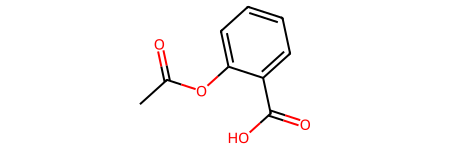

In [17]:
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi)
m

In [18]:
print(f'The number of heavy atoms (non-hydrogen atoms) in the molecule is {m.GetNumHeavyAtoms()}')

The number of heavy atoms (non-hydrogen atoms) in the molecule is 13


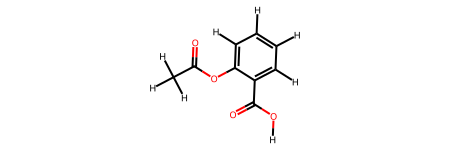

In [19]:
m1 = AllChem.AddHs(m)
m1

In [20]:
adj = Chem.rdmolops.GetAdjacencyMatrix(m)
adj

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int32)

In [22]:
for atom in m.GetAtoms():
    print (atom.GetIdx(), "th atom is ", atom.GetSymbol(), ", total number of hydrogens is", atom.GetTotalNumHs(),
           ", and aromaticity indicator is", atom.GetIsAromatic())

0 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
1 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
2 th atom is  C , total number of hydrogens is 3 , and aromaticity indicator is False
3 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
4 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
5 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
6 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
7 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
8 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
9 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
10 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
11 th atom is  O , total number of hydrogens is 0 , and aro

In [23]:
molwt = Descriptors.ExactMolWt(m)
logP = Descriptors.MolLogP(m)
tpsa = Descriptors.TPSA(m)
Qed = Chem.QED.qed(m)

print(f'Our molecular properties are:\n Molecular weight:{molwt}, \t polarity:{tpsa}, \t solubility:{logP}, \t Quantitative drug-likeness:{Qed}')

Our molecular properties are:
 Molecular weight:180.042258736, 	 polarity:63.60000000000001, 	 solubility:1.3101, 	 Quantitative drug-likeness:0.5501217966938848


In [24]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps)
fps.shape

(1, 1024)

In [29]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/zinc10.txt')

In [28]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]

smile

['Cc1cc(C(=O)NCCN2CCCC2=O)c(C)n1-c1ccc(C#N)cc1',
 'N#Cc1cc(C#N)c(NCCc2cnc(N)s2)nc1Cl',
 'C=C[C@](C)(CC)C(=O)N[C@@H]1CN(CCCC2CCC2)C[C@@H]1O',
 'CC#CCN[C@@H]1CCCN(C(=O)[C@H](C)OCCOCC)C1',
 'C[C@H](NC(=O)C(=O)NCCCCC#N)c1cccc(C(F)(F)F)c1',
 'C=CCn1c(C[C@@H](C)SC)nnc1N(C)C[C@](C)(O)c1ccccc1',
 'C=CCN1CC[C@@H]2[C@H](CCCN2C(=O)Cc2c(C)n[nH]c2C)C1',
 'C=CCOCc1nn(CC2CC2)c2c1CN(C[C@H](C)C(=O)OC)CC2',
 'C[C@H](CCc1ccccc1)Nc1ccc(C#N)cc1F',
 'C=C1CCC(C(=O)N[C@H](C)C[C@@H](C)NCC(N)=O)CC1',
 'C=C(C)CN(C)Cn1nc(N2CCCC2)n(-c2ccccc2Cl)c1=S',
 'Cc1nc(C(=O)N2CCCC[C@@H]2c2cc(NC(=O)c3cccc([C@H](C)C#N)c3)n[nH]2)c(=O)[nH]c1C',
 'C=CCOc1cccc(NC(=O)C(=O)Nc2cnn(C)c2)c1',
 'CC[C@H](C)NC(=O)c1ccc(NC(=O)CCc2ccc(C#N)cc2)c(C)c1',
 'C#CCCCC(=O)N[C@@]1(C)CCCc2ccccc21',
 'C=CCOCCN(C)[C@H]1CCN(CC)[C@H](C)C1',
 'CCc1ccccc1NC(=O)CN(C)C(=O)CSCc1ccc(C#N)cc1',
 'Cc1nn(-c2ccccn2)c(C)c1/C=C/C(=O)c1ccc(C(=O)O)cc1O',
 'N#Cc1cc(Nc2ccsc2)cc(F)c1F',
 'COc1cccc([C@@H]2C[C@@H](C)CN2c2nnc(-c3ccc(C#N)cc3)n2C[C@H]2CCOC2)c1',
 'C[C@@H]1CN(c

In [30]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

,Smiles
0,Cc1cc(C(=O)NCCN2CCCC2=O)c(C)n1-c1ccc(C#N)cc1
1,N#Cc1cc(C#N)c(NCCc2cnc(N)s2)nc1Cl
2,C=C[C@](C)(CC)C(=O)N[C@@H]1CN(CCCC2CCC2)C[C@@H]1O
3,CC#CCN[C@@H]1CCCN(C(=O)[C@H](C)OCCOCC)C1
4,C[C@H](NC(=O)C(=O)NCCCCC#N)c1cccc(C(F)(F)F)c1
...,...
9995,N#Cc1cccc(NC(=O)NCCN2C(=O)CCC2=O)n1
9996,C=C[C@@H]1OCC[C@H]1C(=O)N1C[C@H]2CCN(Cc3nnc(CC...
9997,CC[C@@H](NC(=O)Nc1ccc(C#N)c(C(F)(F)F)c1)[C@@H]...
9998,C=CCn1c([C@H]2CCS(=O)(=O)C2)nnc1N1CCN(C(=O)N2C...


,Smiles,Molecules
0,Cc1cc(C(=O)NCCN2CCCC2=O)c(C)n1-c1ccc(C#N)cc1,
1,N#Cc1cc(C#N)c(NCCc2cnc(N)s2)nc1Cl,
2,C=C[C@](C)(CC)C(=O)N[C@@H]1CN(CCCC2CCC2)C[C@@H]1O,
3,CC#CCN[C@@H]1CCCN(C(=O)[C@H](C)OCCOCC)C1,
4,C[C@H](NC(=O)C(=O)NCCCCC#N)c1cccc(C(F)(F)F)c1,
...,...,...
9995,N#Cc1cccc(NC(=O)NCCN2C(=O)CCC2=O)n1,
9996,C=C[C@@H]1OCC[C@H]1C(=O)N1C[C@H]2CCN(Cc3nnc(CC...,
9997,CC[C@@H](NC(=O)Nc1ccc(C#N)c(C(F)(F)F)c1)[C@@H]...,
9998,C=CCn1c([C@H]2CCS(=O)(=O)C2)nnc1N1CCN(C(=O)N2C...,

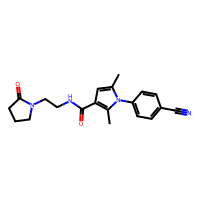
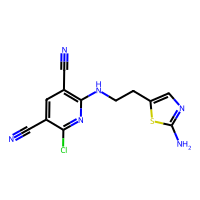
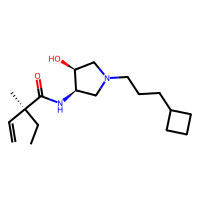
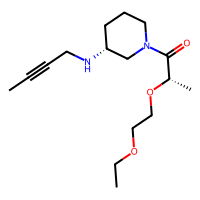
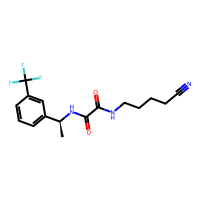
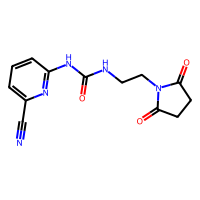
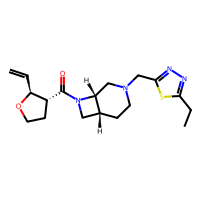
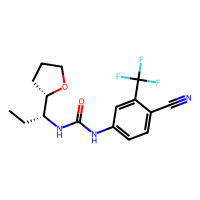
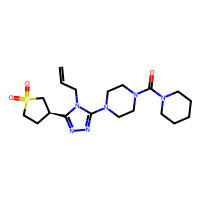
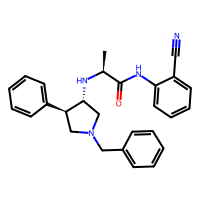

In [31]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [32]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [33]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [34]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [35]:
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

,Smiles,Molecules,MW,LogP,HBD,HBA,PSA,Aromatic Rings,Rotatable Bonds,QED
0,Cc1cc(C(=O)NCCN2CCCC2=O)c(C)n1-c1ccc(C#N)cc1,<rdkit.Chem.rdchem.Mol object at 0x7faf2d87eb90>,350.422,2.31802,1,4,78.13,2,5,0.898757
1,N#Cc1cc(C#N)c(NCCc2cnc(N)s2)nc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7faf2d87fed0>,304.766,2.17166,2,7,111.41,2,4,0.837237
2,C=C[C@](C)(CC)C(=O)N[C@@H]1CN(CCCC2CCC2)C[C@@H]1O,<rdkit.Chem.rdchem.Mol object at 0x7faf2d87f4c0>,308.466,2.33030,2,3,52.57,0,8,0.676751
3,CC#CCN[C@@H]1CCCN(C(=O)[C@H](C)OCCOCC)C1,<rdkit.Chem.rdchem.Mol object at 0x7faf2d87f610>,296.411,1.03190,1,4,50.80,0,8,0.536849
4,C[C@H](NC(=O)C(=O)NCCCCC#N)c1cccc(C(F)(F)F)c1,<rdkit.Chem.rdchem.Mol object at 0x7faf2d87ff40>,341.333,2.69268,2,3,81.99,1,6,0.616431
...,...,...,...,...,...,...,...,...,...,...
9995,N#Cc1cccc(NC(=O)NCCN2C(=O)CCC2=O)n1,<rdkit.Chem.rdchem.Mol object at 0x7faf2d6a3610>,287.279,0.22378,2,5,115.19,1,4,0.768709
9996,C=C[C@@H]1OCC[C@H]1C(=O)N1C[C@H]2CCN(Cc3nnc(CC...,<rdkit.Chem.rdchem.Mol object at 0x7faf2d6a3680>,362.499,1.72430,0,6,58.56,1,5,0.746777
9997,CC[C@@H](NC(=O)Nc1ccc(C#N)c(C(F)(F)F)c1)[C@@H]...,<rdkit.Chem.rdchem.Mol object at 0x7faf2d6a36f0>,341.333,3.65618,2,3,74.15,1,4,0.877637
9998,C=CCn1c([C@H]2CCS(=O)(=O)C2)nnc1N1CCN(C(=O)N2C...,<rdkit.Chem.rdchem.Mol object at 0x7faf2d6a3760>,422.555,1.09410,0,7,91.64,1,4,0.674901


In [36]:
data.isnull().sum()

Smiles             0
Molecules          0
MW                 0
LogP               0
HBD                0
HBA                0
PSA                0
Aromatic Rings     0
Rotatable Bonds    0
QED                0
dtype: int64

In [37]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [38]:
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [39]:
fps.shape

(10000, 1024)

In [40]:
logp = data.iloc[:,3].values

In [41]:
logp.shape[0] == fps.shape[0]

True

In [42]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [43]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))

The r2_score is 0.7779118109919254  and the mean square error is 0.35506042908319335


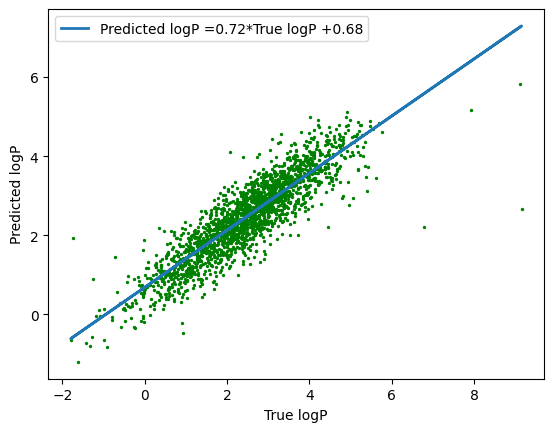

In [45]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant :

In [48]:
! pip install qiskit-nature-pyscf -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 19.0 MB/s eta 0:00:00


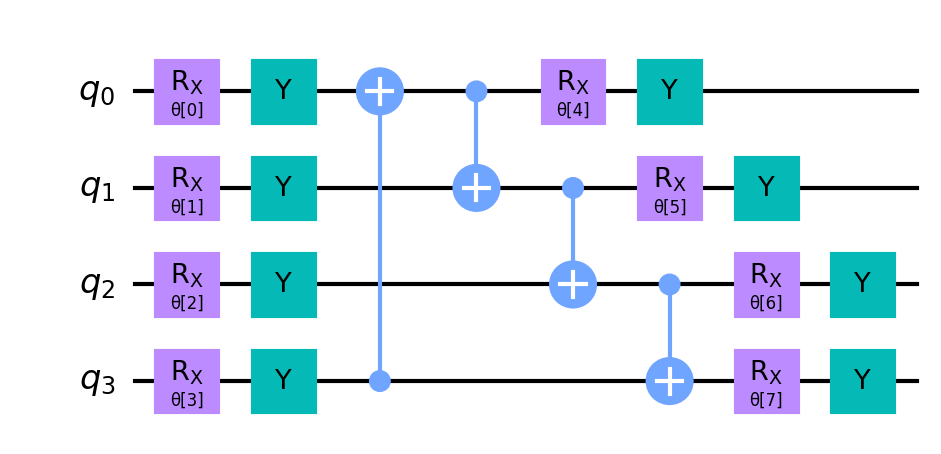

In [46]:
Image(filename='./SU2_Ansatz.png', width=400)

In [51]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from math import pi
backend = BasicAer.get_backend('unitary_simulator')
import matplotlib.pyplot as plt
from qiskit.quantum_info.operators import Operator, Pauli

In [58]:
parameter_0 = Parameter('theta[0]')
circuitQ = QuantumCircuit(4)
circuitQ.rx(theta = parameter_0,qubit = 0)
circuitQ.rx(theta = parameter_1,qubit = 1)
circuitQ.rx(theta = parameter_2,qubit = 2)
circuitQ.rx(theta = parameter_3,qubit = 3)
circuitQ.y(0)

circuitQ.draw('mpl',initial_state=True)

NameError: ignored

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [55]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper
        optimizer : optimizer

    Returns: vqe solver algorithm
    """

    #ansatz
    ansatz = SU2ansatz # previously constructed

    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)

    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)

    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)

    return algorithm

In [56]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [57]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

# Put your code here

In [ ]:
from qiskit_nature.second_q.mappers import (
    ParityMapper,
    JordanWignerMapper,
    BravyiKitaevMapper,
    QubitConverter
)

def ansatz(converter):
    """Ansatz function

    Args:
        converter : the output of the function qubit_converter(mapper)

    Returns: The anstatz
    """

    ansatz = SU2ansatz(
        circuitQ,
        (theta,

        ),
    )
    return ansatz

In [ ]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [ ]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np
#permet d calculer l'energie
def vqe_solver(converter, optimizer):# le mapper ici on choisi ce qu'on veut mettre on peut mettre jw; bk
    """ Setup VQE solver

    Args:
        converter : qubit converter
        optimizer : optimizer

    Returns: vqe solver
    """
    vqe_solver = VQE(estimator, circuitQ, optimizer)
# par exemple si on veut plutot utiliser le circuit on remplace ansatz par le circuit
    #vqe_solver.initial_point = np.zeros(ansatz(converter).num_parameters)
    return vqe_solver

In [ ]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"

        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"

    Returns:
          The ground state of the molecule

    """
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:
            q_conv = qubit_converter(v)

    if solver == "VQE":
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:
                opt = m
        GS_solver = vqe_solver(q_conv, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(q_conv, GS_solver)

    # Leveraging Qiskit Runtime
    start = time.time()

    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))

    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import parameter
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")